In [42]:
import pandas as pd 
import numpy as np 
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.rc("figure", figsize=(8, 8))
plt.rc("font", size=14)

##### Temperature (T), Ambient Pressure (AP),
##### Relative Humidity (RH) and Exhaust Vacuum (V) 
##### to predict the net hourly electrical
##### energy output (EP) of the plant.

### Question 1.b.(i)

In [43]:
df =pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx',sheet_name='Sheet1')
display(df)
print("The number of rows in the Dataset are:",df.shape[0])
print("The number of columns in the Dataset are:",df.shape[1])

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

The number of rows in the Dataset are: 9568
The number of columns in the Dataset are: 5


What do the rows
and columns represent?

The columns of the dataset which comprises of the independent variables namely:-
Ambient Temperature (T), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH),
their effects on the the dependent variable Net hourly electrical Energy Output (PE). 

The Rows represents the records for each term.

### Question i.b.ii

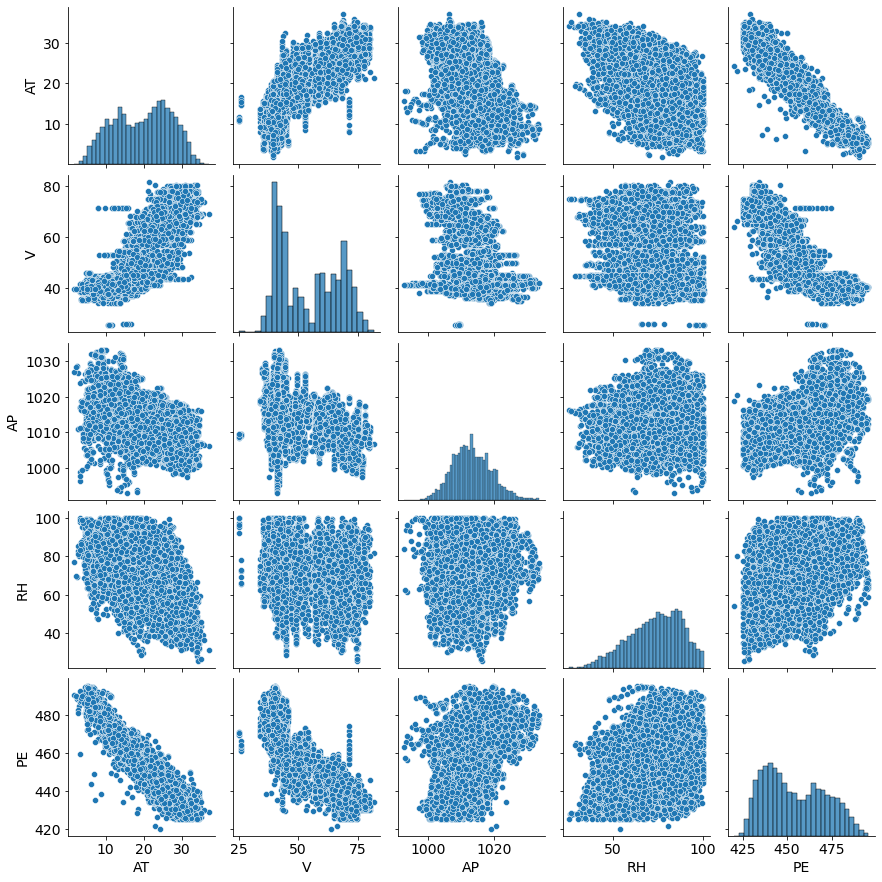

In [44]:
sns.pairplot(df,kind="scatter",palette=['yellow','green'])

There is negative correlation between Ambient Temperature (AT) and Electrical Output (PE) and between Exhaust Vacuum (V) and Electrical Output (PE). 

### Question 1.b.iii
##### Range and interquartile

In [45]:
def describe_properties(df):
    df_new = df.describe()
    df_new.loc["Range"] = df_new.loc['max'] - df_new.loc['min']
    df_new.loc["IQR"] = df_new.loc['75%'] - df_new.loc['25%']
    return df_new
df_answer=describe_properties(df)
df_answer=df_answer.drop(['count', 'std','min','max'])
print(df_answer)

              AT          V           AP         RH          PE
mean   19.651231  54.305804  1013.259078  73.308978  454.365009
25%    13.510000  41.740000  1009.100000  63.327500  439.750000
50%    20.345000  52.080000  1012.940000  74.975000  451.550000
75%    25.720000  66.540000  1017.260000  84.830000  468.430000
Range  35.300000  56.200000    40.410000  74.600000   75.500000
IQR    12.210000  24.800000     8.160000  21.502500   28.680000


### Question i.c

Ambient Temperature with Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:10   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

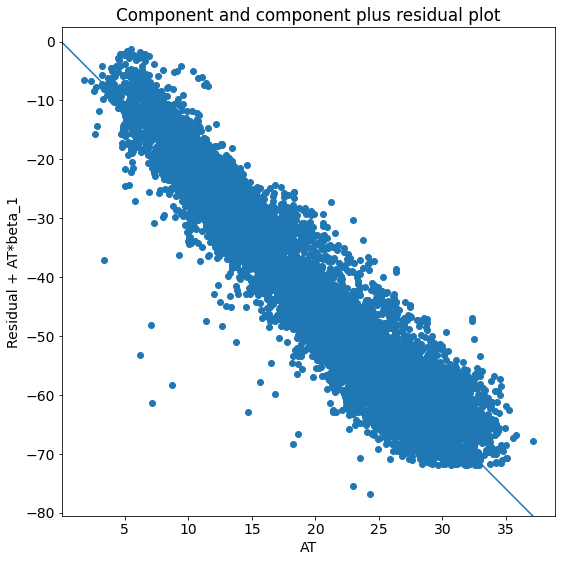

In [46]:
import statsmodels.api as smf
from scipy import stats
df_temp=df[['AT','PE']].copy()
y=df_temp["PE"]
x=df_temp["AT"]
x=smf.add_constant(x)

AT_stat_model=smf.OLS(y,x).fit()
print(AT_stat_model.summary())
ls_AT=AT_stat_model.params[1]
print(ls_AT)

fig=smf.graphics.plot_ccpr(AT_stat_model,"AT")
fig.tight_layout(pad=1.0)

Since the P-value is very less i.e 0.000, and the F-score is very large i.e 8.510e+04, the null hypothesis can be rejected.

###### Exhaust Vacuum vs Electrical output 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:11   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

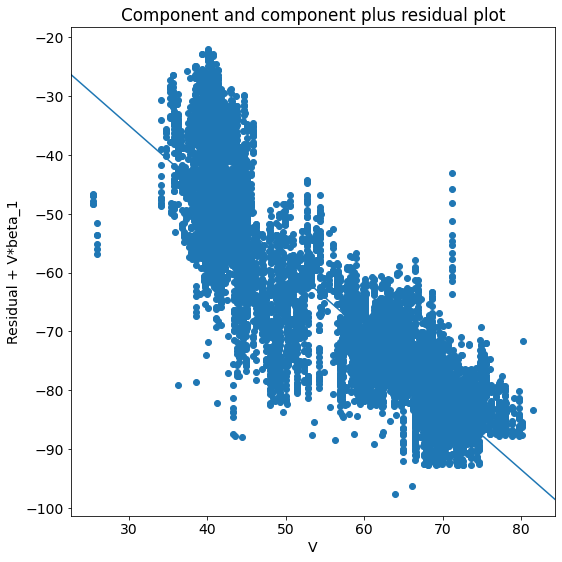

In [47]:
import statsmodels.api as smf
from scipy import stats
from statsmodels.graphics.regressionplots import abline_plot
df_vacuum=df[['V','PE']].copy()
y=df_vacuum["PE"]
x=df_vacuum["V"]
x=smf.add_constant(x)
V_stat_model=smf.OLS(y,x).fit()
print(V_stat_model.summary())
ls_V= V_stat_model.params[1]
print(ls_V)

fig=smf.graphics.plot_ccpr(V_stat_model,"V")
fig.tight_layout(pad=1.0)

Since the P-value is very less i.e 0.000, and the F-score is very large i.e 2.972e+04, the null hypothesis can be rejected.

###### Ambient Pressure (AP) vs Electrical Output(PE)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:11   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

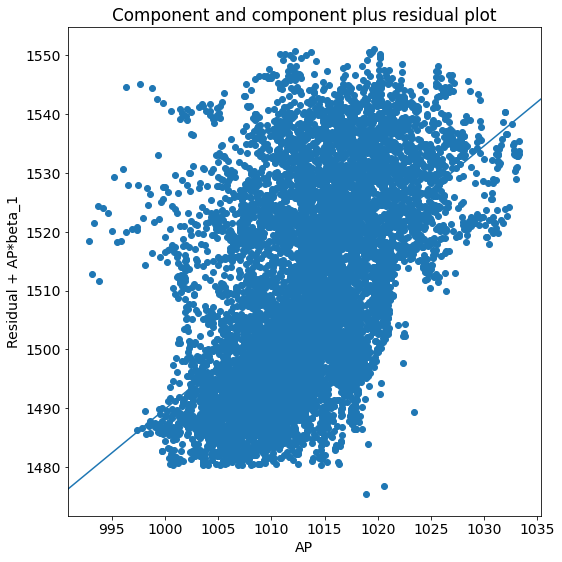

In [48]:
import statsmodels.api as smf
from scipy import stats
df_pressure=df[['AP','PE']].copy()
y=df_pressure["PE"]
x=df_pressure["AP"]
x=smf.add_constant(x)
press_stat_model=smf.OLS(y,x).fit()
print(press_stat_model.summary())
ls_P=press_stat_model.params[1]
print(ls_P)

fig=smf.graphics.plot_ccpr(press_stat_model,"AP")
fig.tight_layout(pad=1.0)

Since the P-value is very less i.e 0.000, and the F-score is very large i.e 3516, the null hypothesis can be rejected.

###### Relative Humidity(RH) vs  Electrical Output(PE)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:12   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

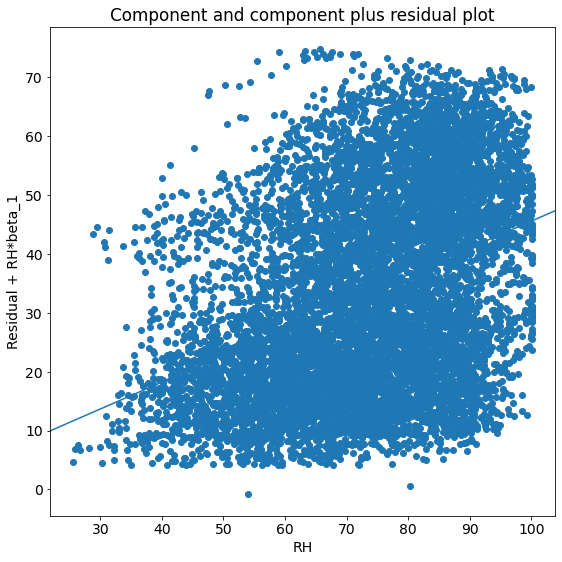

In [49]:
import statsmodels.api as smf
from scipy import stats
df_humidity=df[['RH','PE']].copy()
y=df_humidity["PE"]
x=df_humidity["RH"]
x=smf.add_constant(x)
humidity_stat_model=smf.OLS(y,x).fit()
print(humidity_stat_model.summary())
ls_H=humidity_stat_model.params[1]
print(ls_H)

fig=smf.graphics.plot_ccpr(humidity_stat_model,"RH")
fig.tight_layout(pad=1.0)

Since the P-value is very less i.e 0.000, and the F-score is very large i.e 1714, the null hypothesis can be rejected.

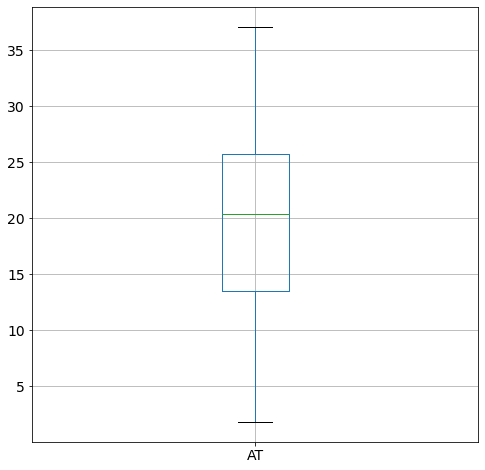

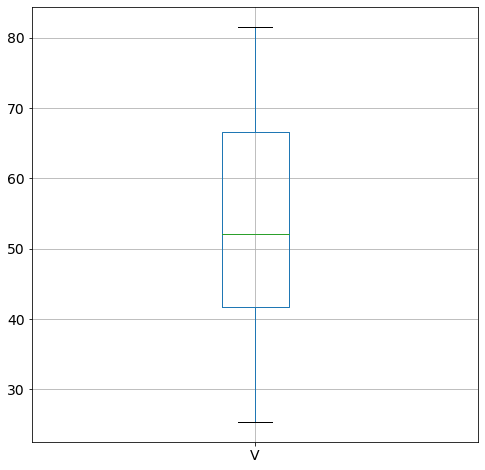

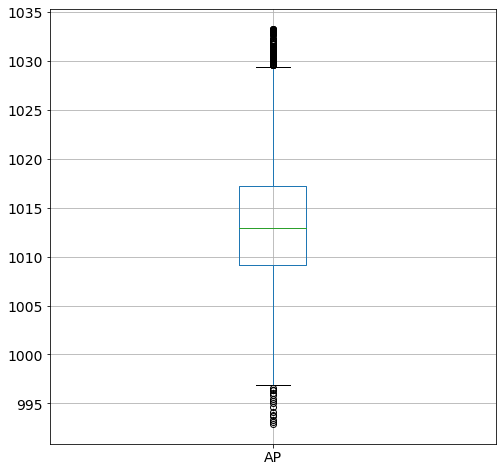

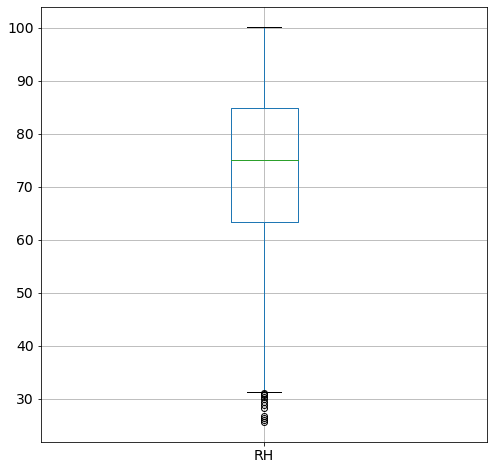

In [50]:
df1=df.drop(columns=["PE"])
for coloumn in df1:
    plt.figure()
    df.boxplot([coloumn])

There are Outliers for the Ambient Pressure and Relative Humdity variables.

### Question 1.d
##### Multiple features linear regression


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:13   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

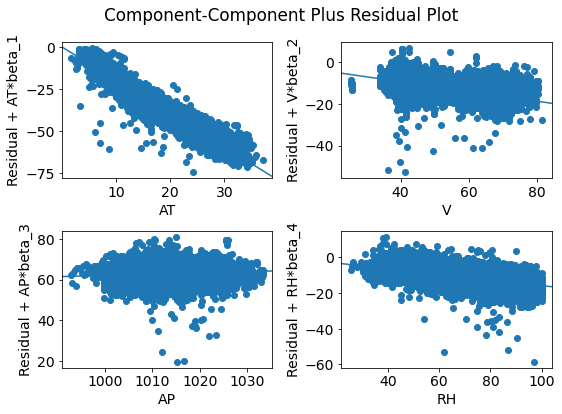

In [51]:
import statsmodels.api as smf
from scipy import stats

y=df["PE"]
x=df[["AT","V","AP","RH"]]
x=smf.add_constant(x)
multiple_stat_model=smf.OLS(y,x).fit()
print(multiple_stat_model.summary())
ls_mul1=multiple_stat_model.params[1]
ls_mul2=multiple_stat_model.params[2]
ls_mul3=multiple_stat_model.params[3]
ls_mul4=multiple_stat_model.params[4]


fig=smf.graphics.plot_ccpr_grid(multiple_stat_model)
fig.tight_layout(pad=1.0)
plt.show()

Since the p-values for all the predictors is very less i.e 0.000, we can reject the null hypothesis for all the predictors.

### Question 1.e





[-2.1713199585178002, -1.1681351265557094, 1.4898716733991142, 0.455650102262979]
[-1.9775131066353933, -0.23391642258249778, 0.06208294378085516, -0.15805410291641486]


<Figure size 720x1440 with 0 Axes>

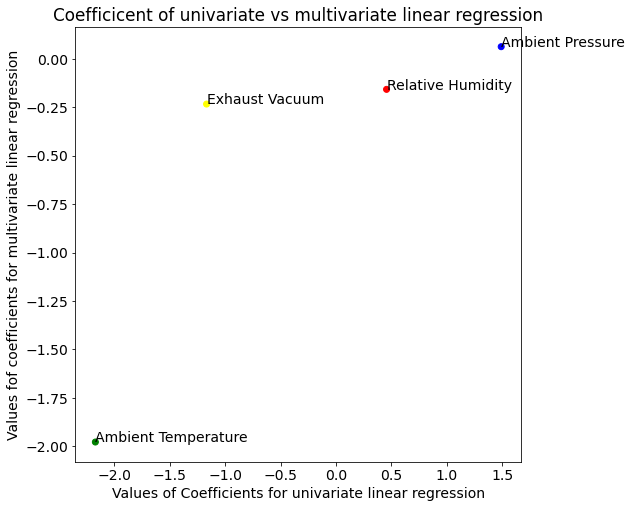

<Figure size 720x1440 with 0 Axes>

In [52]:
import itertools
ls=[ls_AT,ls_V,ls_P,ls_H]
print(ls)
ls_mul=[ls_mul1,ls_mul2,ls_mul3,ls_mul4]
print(ls_mul)
annotations=["Ambient Temperature","Exhaust Vacuum","Ambient Pressure","Relative Humidity"]

plt.scatter(x=ls,y=ls_mul,color=["green","yellow","blue","red"])


for i, label in enumerate(annotations):
    plt.annotate(label, (ls[i], ls_mul[i]))
plt.xlabel("Values of Coefficients for univariate linear regression")
plt.ylabel("Values fof coefficients for multivariate linear regression")
plt.title("Coefficicent of univariate vs multivariate linear regression")
plt.figure(figsize=(10, 20))


1.c)

The R2 squared term for 

AT- 0.899, the linear model fits well.

V- 0.757, model is decent fit.

AP- 0.269, compared to others its a poor fit.

RH- 0.152compared to others its a poor fit.

1.d)

The R2squared term for multiple regrression is 0.929

Therefore, the value is a high indicating that the model fits with the regrression line.

### Question 1.f 


###### Polynomial Function for Ambient Temperature 

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly=df_temp["AT"].values.reshape(-1,1)

x_poly_AT=poly.fit_transform(x_poly)

AT_poly_stat_model=smf.OLS(y,x_poly_AT).fit()
print(AT_poly_stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

###### Polynomial Function for Exhaust Vacuum

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly=df_vacuum["V"].values.reshape(-1,1)

x_poly_V=poly.fit_transform(x_poly)

V_poly_stat_model=smf.OLS(y,x_poly_V).fit()
print(V_poly_stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:15   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

###### Polynomial Function for  Ambient Pressure

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly=df_pressure["AP"].values.reshape(-1,1)

x_poly_AP=poly.fit_transform(x_poly)

AP_poly_stat_model=smf.OLS(y,x_poly_AP).fit()
print(AP_poly_stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:15   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

###### Polynomial Function for Relative humidity 

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly=df_humidity["RH"].values.reshape(-1,1)

x_poly_RH=poly.fit_transform(x_poly)

RH_poly_stat_model=smf.OLS(y,x_poly_RH).fit()
print(RH_poly_stat_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:49:15   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

Yes there is a non-linear association between the predictors and the response, since there is significant term in the Cube term for Exhaust vacuum.

### Question 1.g

In [57]:
from sklearn.preprocessing import PolynomialFeatures

X_interac= df.drop(columns=['PE']) #features
X_interac= X_interac.reset_index(drop=True)
# print(X_interac)

poly = PolynomialFeatures(interaction_only=True)
af=poly.fit_transform(X_interac)
pair_interac_heads= poly.get_feature_names_out()
for i,j in enumerate(pair_interac_heads[5:]):
        X_interac[j]=af[:,i+5]
Y=df["PE"]   


interac_poly_stat_model=smf.OLS(Y,X_interac).fit()
print(interac_poly_stat_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:49:15   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Yes there is association between the predictors and response since the pairwise interaction terms are significant because there p-values are very less.

### Question 1.h

In [58]:
import statsmodels.api as smf
from sklearn.metrics import mean_squared_error

Y=df.iloc[:,[-1]]#labels
Y= Y.reset_index(drop=True)

X= df.drop(columns=['PE']) #features
X= X.reset_index(drop=True)
X=smf.add_constant(x)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=40)
single_reg= LinearRegression().fit(X_train,Y_train)
single_pred_test= single_reg.predict(X_test)
single_pred_train= single_reg.predict(X_train)

MSE_single_train= metrics.mean_squared_error(Y_train, single_pred_train)
MSE_single_test= metrics.mean_squared_error(Y_test,single_pred_test)
print("The mean square error for train data is:", MSE_single_train)
print("The mean square error for test data is:",MSE_single_test)

The mean square error for train data is: 20.422763302495003
The mean square error for test data is: 21.605882405224374


##### Creating square terms

In [59]:
d_combine= pd.DataFrame()
d_combine["V*V"]=df["V"]**2
d_combine["AT*AT"]=df["AT"]**2
d_combine["AP*AP"]= df["AP"]**2
d_combine["RH*Rh"]=df["RH"]**2
d_combine["AT*V"]=df["AT"]*df["V"]
d_combine["AT*AP"]=df["AT"]*df["AP"]
d_combine["AT*RH"]=df["AT"]*df["RH"]
d_combine["V*AP"]=df["V"]*df["AP"]
d_combine["V*RH"]=df["V"]*df["RH"]
d_combine["AP*RH"]=df["AP"]*df["RH"]
# frames=[df,d_combine]


d_combined=pd.concat([df1,d_combine],axis=1)
# d_combined=smf.add_constant(d_combined)


In [60]:
X_train_combine, X_test_combine, Y_train_combine, Y_test_combine = train_test_split(d_combined, df["PE"], test_size=0.30,random_state=40)
single_reg= LinearRegression().fit(X_train_combine,Y_train_combine)
single_pred_test_combine= single_reg.predict(X_test_combine)
single_pred_train_combine= single_reg.predict(X_train_combine)

MSE_single_train_combine= metrics.mean_squared_error(Y_train_combine, single_pred_train_combine)
MSE_single_test_combine= metrics.mean_squared_error(Y_test_combine,single_pred_test_combine)
print("The mean square error for combined train data is:", MSE_single_train_combine)
print("The mean square error for combined test data is:",MSE_single_test_combine)

combined_stat_model=smf.OLS(Y_train_combine,X_train_combine).fit()
print(combined_stat_model.summary())

The mean square error for combined train data is: 17.818371788915332
The mean square error for combined test data is: 18.82103815826128
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.520e+06
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:49:15   Log-Likelihood:                         -19156.
No. Observations:                6697   AIC:                                  3.834e+04
Df Residuals:                    6683   BIC:                                  3.843e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                   

In [61]:
df_last=d_combined.drop(["V*V","V*AP","V*RH"],axis=1)

X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(df_last, df["PE"], test_size=0.30,random_state=40)
fnl_reg= LinearRegression().fit(X_train_final,Y_train_final)
fnl_pred_test= fnl_reg.predict(X_test_final)
fnl_pred_train= fnl_reg.predict(X_train_final)

MSE_fnl_train= metrics.mean_squared_error(Y_train_final, fnl_pred_train)
MSE_fnl_test= metrics.mean_squared_error(Y_test_final,fnl_pred_test)
print("The mean square error for train data is:", MSE_fnl_train)
print("The mean square error for test data is:",MSE_fnl_test)

fnl_stat_model=smf.OLS(Y_train_final,X_train_final).fit()
print(fnl_stat_model.summary())

The mean square error for train data is: 17.829280848055138
The mean square error for test data is: 18.82231079772782
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.026e+06
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:49:15   Log-Likelihood:                         -19157.
No. Observations:                6697   AIC:                                  3.834e+04
Df Residuals:                    6686   BIC:                                  3.841e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
  

### Question 1.i


In [62]:
from sklearn.model_selection import train_test_split


Y=df.iloc[:,[-1]]#labels
Y= Y.reset_index(drop=True)

X= df.drop(columns=['PE']) #features
X= X.reset_index(drop=True)
 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30,random_state=42)


In [63]:
from sklearn.neighbors import KNeighborsRegressor

test_error=[]
train_error=[]

k=[x for x in range(1,101)]
mse_test_raw=[]

 
for i in k:
    model_fit=KNeighborsRegressor(n_neighbors=i)
    model_fit.fit(X_train,Y_train)
    
    train_score=1-model_fit.score(X_train,Y_train)
    train_error.append(train_score)
    
    test_score=1-model_fit.score(X_test,Y_test)
    test_error.append(test_score)

min_test=min(test_error)

min_index=test_error.index(min_test)
min_train=train_error[min_index]
Best_k= k[min_index]
print(Best_k)
print(min_test)
print(min_train)

model_knn_pred_test=model_fit.predict(X_test)
mse_test_raw.append(mean_squared_error(Y_test,model_knn_pred_test))

min_error_mse_test=min(mse_test_raw)

print(min_error_mse_test)


5
0.05364592369711796
0.0365005419374449
21.5083114550923


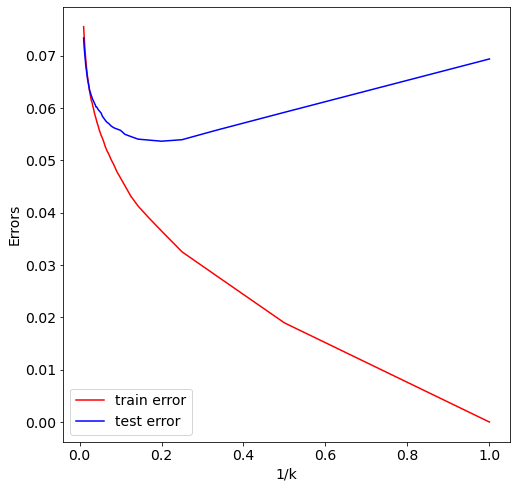

In [64]:
k1=[1/x for x in k]

plt.plot((k1),train_error,color='red',label="train error")
plt.plot((k1),test_error,color='blue',label="test error")
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.legend()

#### Normalized polynomial function


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


Y_norm=df.iloc[:,[-1]]#labels
Y_norm= Y_norm.reset_index(drop=True)

X= df.drop(columns=['PE']) #features
X_norm = preprocessing.MinMaxScaler()
X_normal=X_norm.fit_transform(X)

 
X_train, X_test_norm, Y_train, Y_test_norm = train_test_split(X_normal, Y_norm, test_size=0.30,random_state=42)
test_error_norm=[]
train_error_norm=[]

k_norm=[x for x in range(1,101)]
mse_test_norm=[]

 
for i in k_norm:
    model_fit_norm=KNeighborsRegressor(n_neighbors=i)
    model_fit_norm.fit(X_train,Y_train)
    
    train_score_norm=1-model_fit_norm.score(X_train,Y_train)
    train_error_norm.append(train_score_norm)
    
    test_score_norm=1-model_fit_norm.score(X_test_norm,Y_test_norm)
    test_error_norm.append(test_score_norm)    
    
    
min_test_norm=min(test_error_norm)
min_index_norm=test_error_norm.index(min_test_norm)
Best_k_norm= k_norm[min_index_norm]
min_train_norm=train_error_norm[min_index_norm]
print(Best_k_norm)

model_knn_pred_test_norm=model_fit.predict(X_test_norm)
mse_test_norm.append(mean_squared_error(Y_test_norm,model_knn_pred_test_norm))

min_mse_test_norm=min(mse_test_norm)

print("The mse is :",min_mse_test_norm)



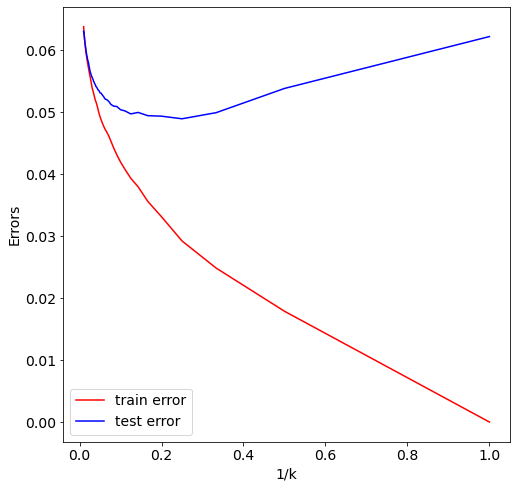

In [66]:
k1_norm=[1/x for x in k_norm]

plt.plot((k1_norm),train_error_norm,color='red',label="train error")
plt.plot((k1_norm),test_error_norm,color='blue',label="test error")
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.legend()

### Question 1.j

In [67]:
test_error_data=[["Linear Regression simple",MSE_single_test],["Linear Regression with combined terms",MSE_single_test_combine],["Linear Regression removing insignificant terms",MSE_fnl_test],["KNN regression raw",min_error_mse_test],["KNN regression normalized",min_mse_test_norm]]
error_table=pd.DataFrame(test_error_data,columns=["Parameters","Minimum Errors"])
error_table

Parameters  Minimum Errors
0                        Linear Regression simple       21.605882
1           Linear Regression with combined terms       18.821038
2  Linear Regression removing insignificant terms       18.822311
3                              KNN regression raw       21.508311
4                       KNN regression normalized      301.877933

### ISLR 2.4.1

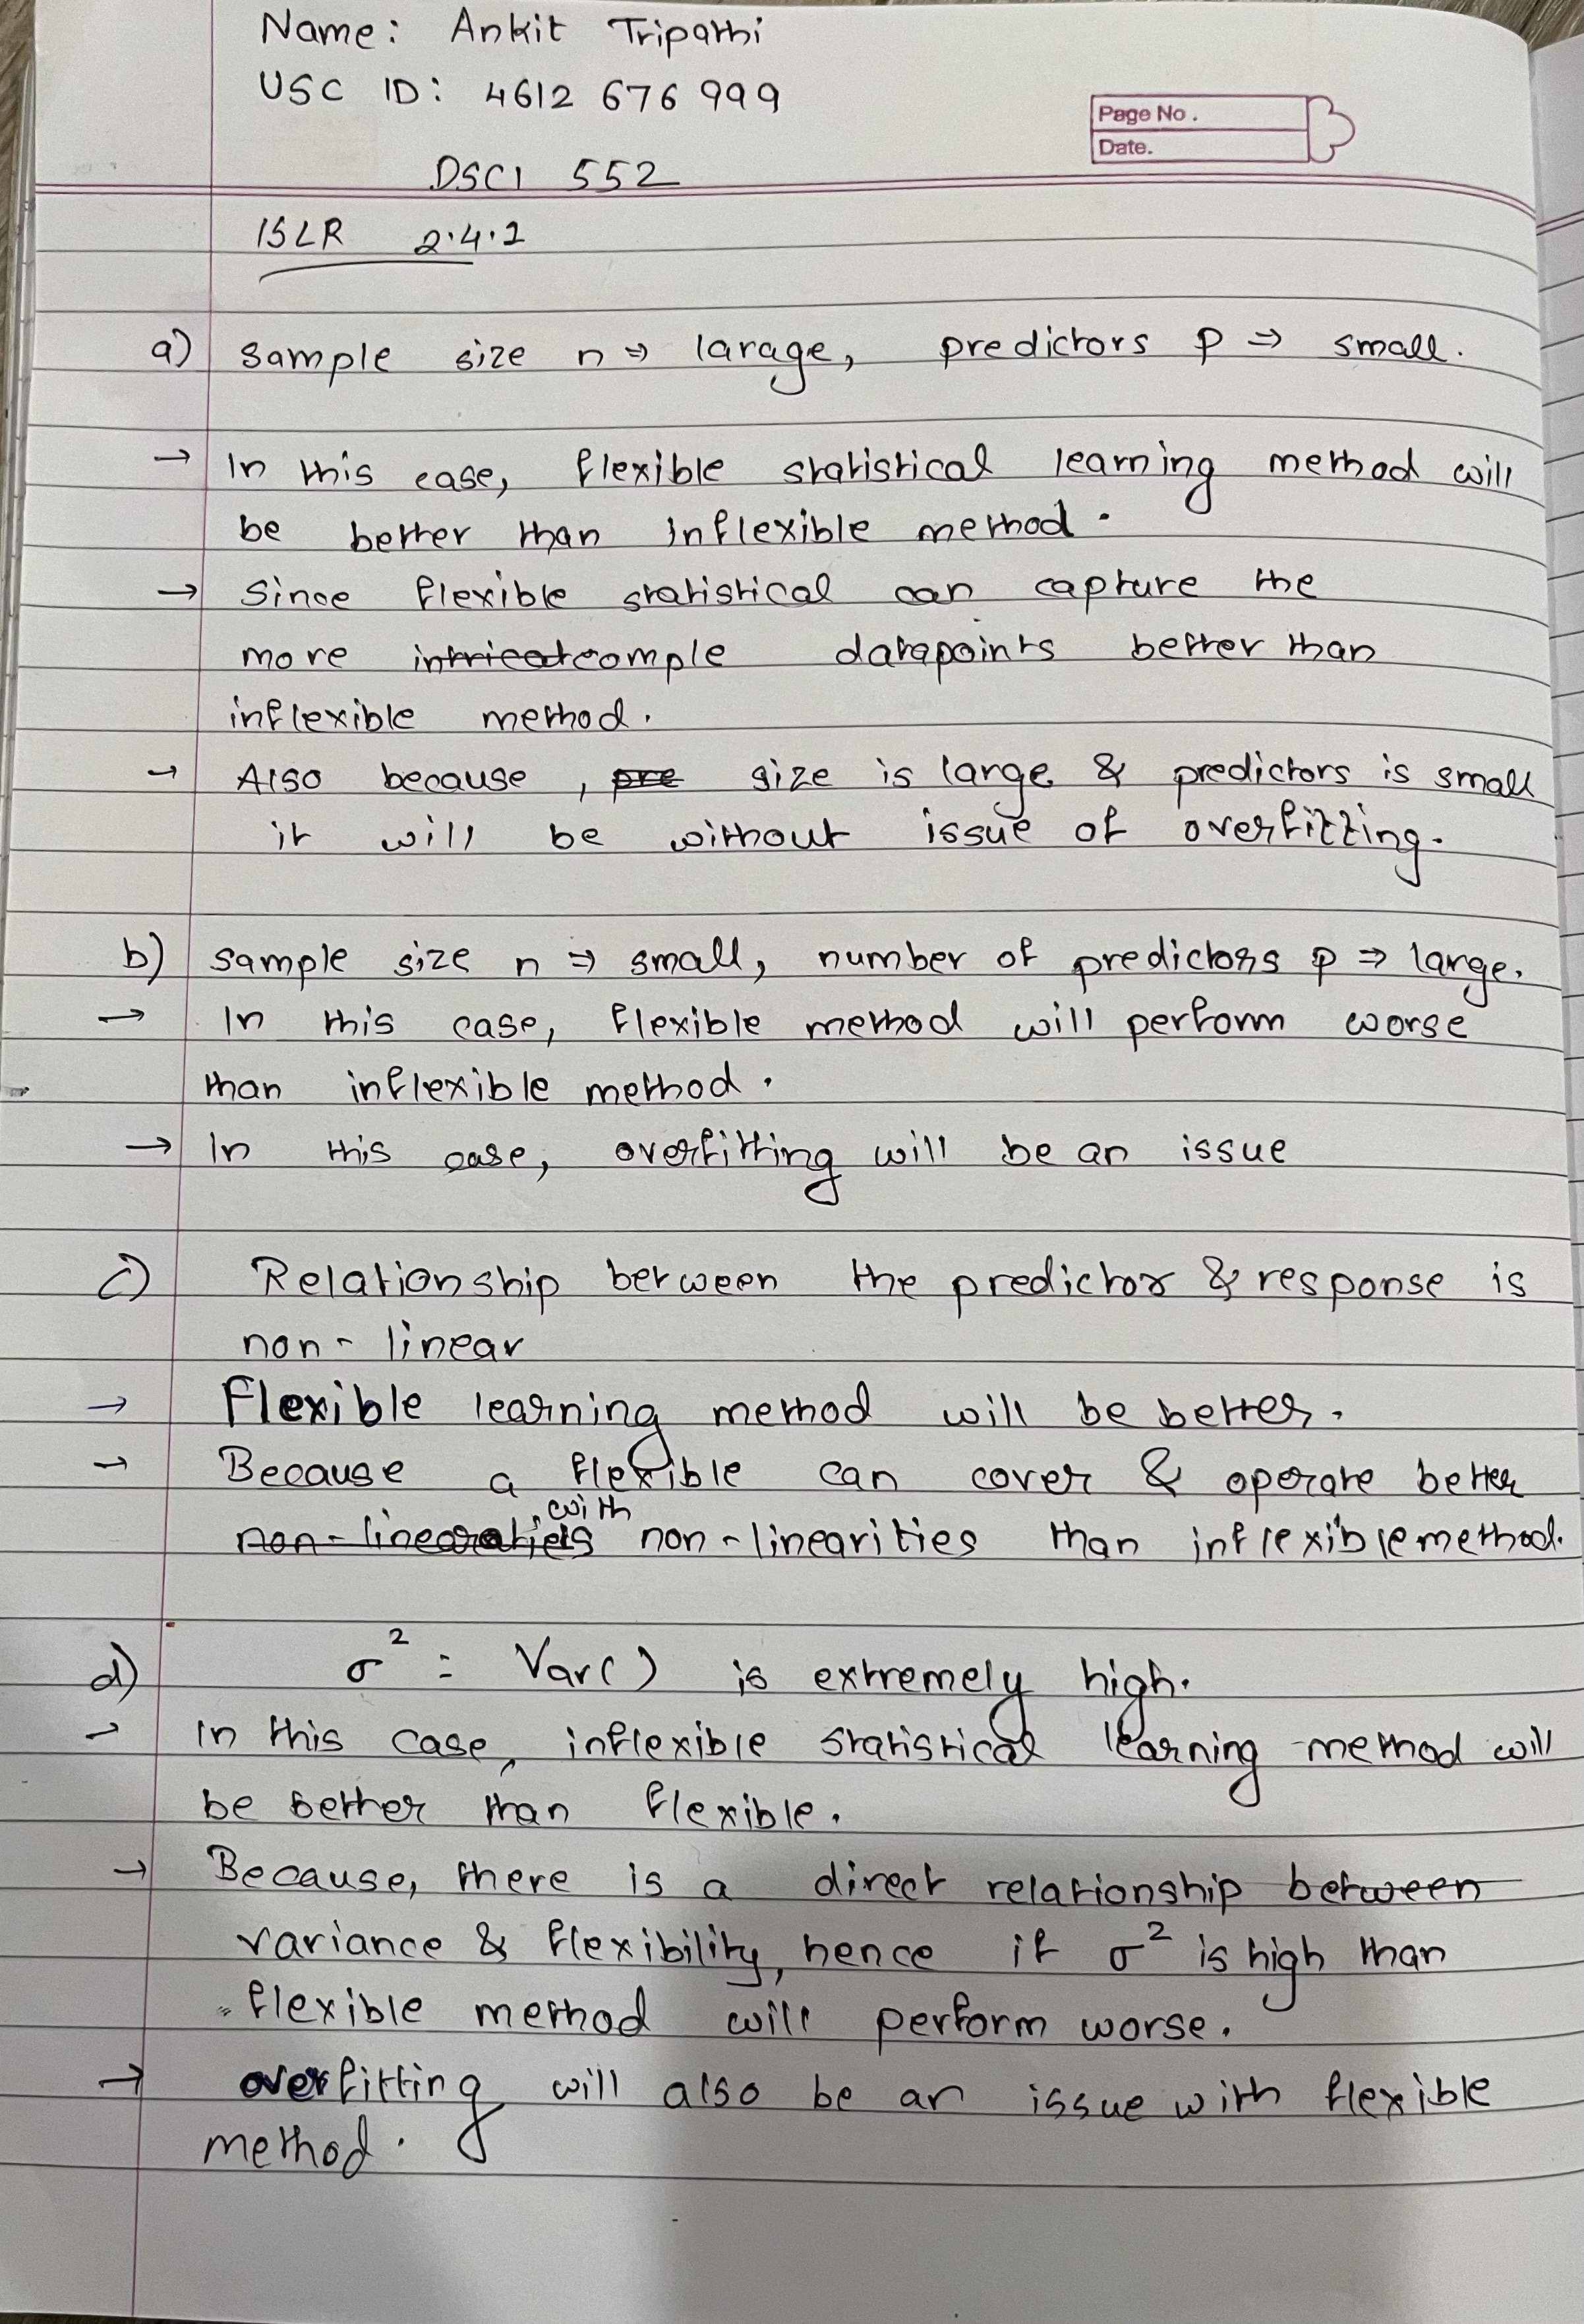

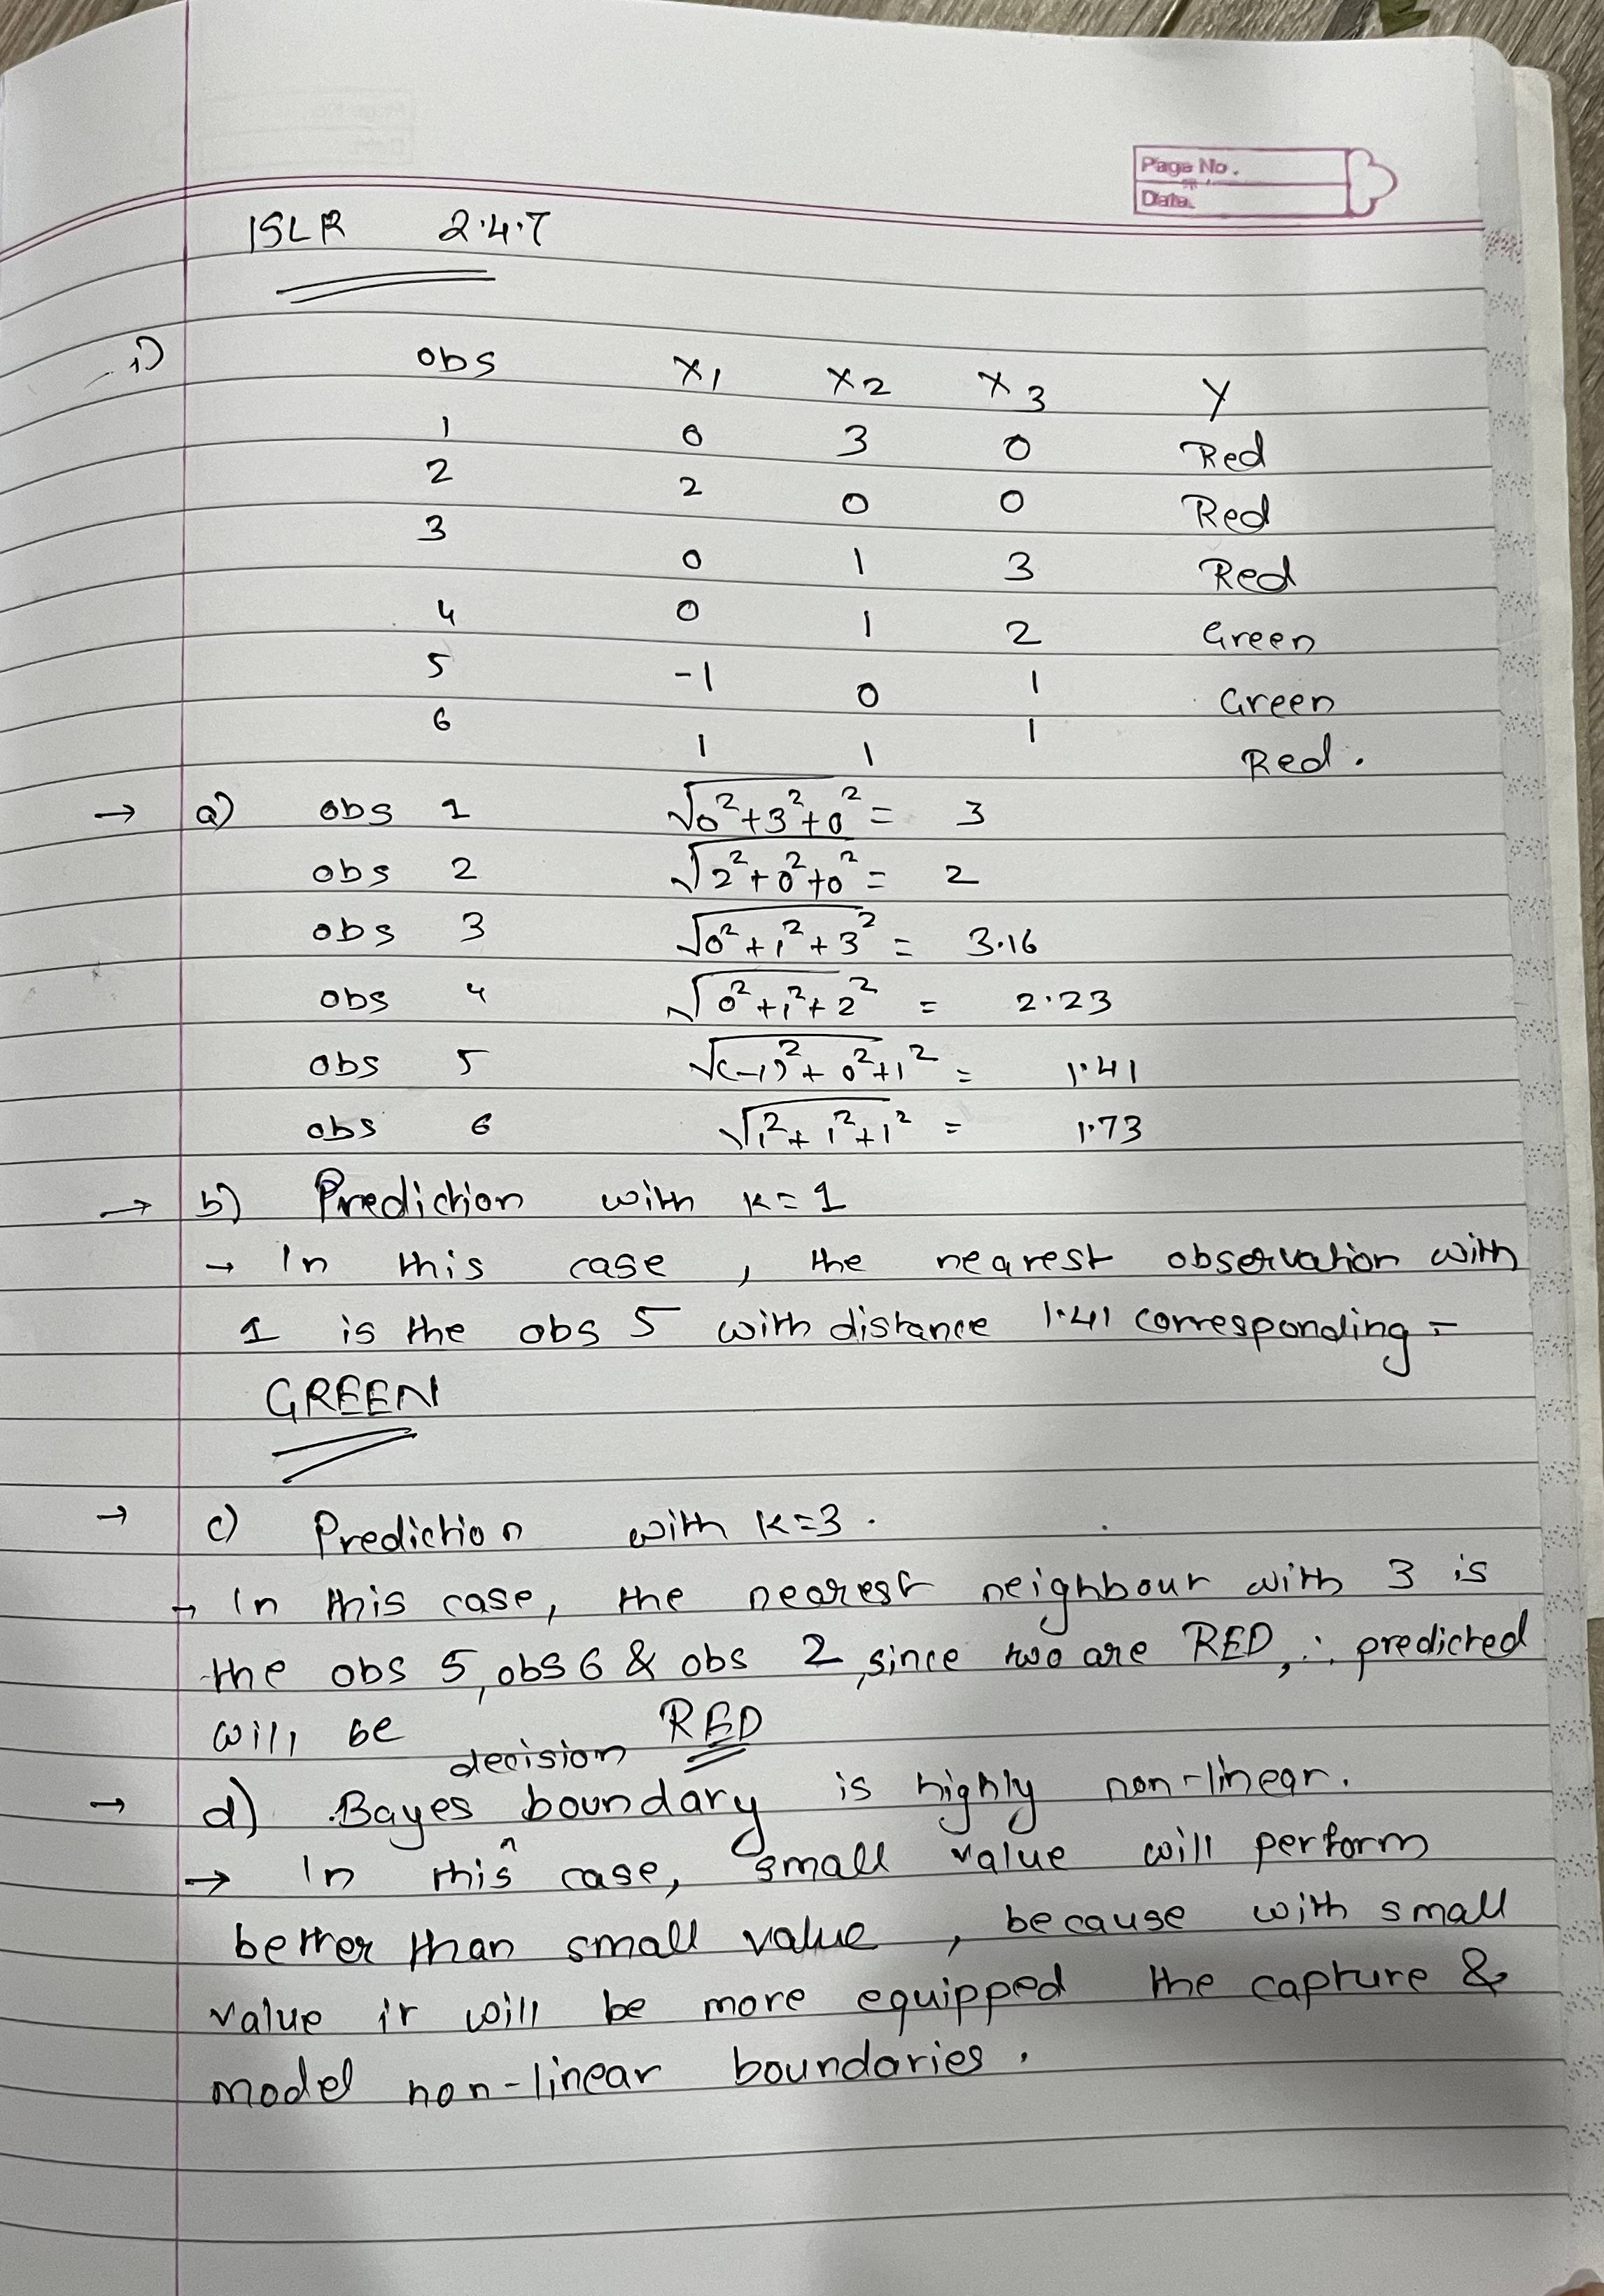